In [1]:
import pandas as pd

In [2]:

#load the data we use
data_identification = pd.read_csv('data_identification.csv')
emotion = pd.read_csv('emotion.csv')
sampleSubmission = pd.read_csv('sampleSubmission.csv')

#test input

print(data_identification.head(5))
print('--------------------')
print(emotion.head(5))
print('--------------------')
print(sampleSubmission.head(5))

   tweet_id identification
0  0x28cc61           test
1  0x29e452          train
2  0x2b3819          train
3  0x2db41f           test
4  0x2a2acc          train
--------------------
   tweet_id       emotion
0  0x3140b1       sadness
1  0x368b73       disgust
2  0x296183  anticipation
3  0x2bd6e1           joy
4  0x2ee1dd  anticipation
--------------------
         id   emotion
0  0x2c7743  surprise
1  0x2c1eed  surprise
2  0x2826ea  surprise
3  0x356d9a  surprise
4  0x20fd95  surprise


In [3]:
import json
from pandas.io.json import json_normalize

tweet_json = pd.read_json('tweets_DM.json', lines=True)
#used for nested format column['_source']
tweets_normalize = json_normalize(tweet_json['_source'])

tweets_normalize.head(5)

,tweet.hashtags,tweet.tweet_id,tweet.text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [4]:
tweets_normalize.rename(columns={'tweet.hashtags': 'hashtags', 'tweet.text': 'text', 'tweet.tweet_id': 'tweet_id'}, inplace=True)
tweets_normalize.head(5)

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [5]:
#merge emotion to dataframe according tweet_id 
#outer->union
merge_pd = pd.merge(tweets_normalize, data_identification, how='outer', on=['tweet_id'])

In [6]:
merge_pd = pd.merge(merge_pd, emotion, how='outer', on=['tweet_id'])

In [7]:
merge_pd.head(5)

,hashtags,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,NaN
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN


In [8]:
merge_pd.head(5).text

0    People who post "add me on #Snapchat" must be ...
1    @brianklaas As we see, Trump is dangerous to #...
2    Confident of your obedience, I write to you, k...
3                  Now ISSA is stalking Tasha 😂😂😂 <LH>
4    "Trust is not the same as faith. A friend is s...
Name: text, dtype: object

In [9]:
tweets_train = merge_pd[merge_pd['identification'] == 'train']
tweets_test = merge_pd[merge_pd['identification'] == 'test']

In [10]:
print(tweets_train.count())
print('------------------')
print(tweets_test.count())

hashtags          1455563
tweet_id          1455563
text              1455563
identification    1455563
emotion           1455563
dtype: int64
------------------
hashtags          411972
tweet_id          411972
text              411972
identification    411972
emotion                0
dtype: int64


## Save Data to Pickle(as lab2)
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time. 

In [11]:
## save to pickle file
tweets_train.to_pickle("train_df_Angel.pkl") 
tweets_test.to_pickle("test_df_Angel.pkl")

In [12]:
train_pickle = pd.read_pickle("train_df_Angel.pkl")
test_pickle = pd.read_pickle("test_df_Angel.pkl")

In [13]:
#train_pickle['text'][3] = train_pickle['text'][3].replace('<LH>', str(train_pickle['emotion'][3]))
print(train_pickle['text'][1455563])
#train_pickle.head(10)

Van Til: "God has an attitude of favor to men as men, whether they be elect or reprobate." <LH> #CommonGrace #Election #Reprobation


In [14]:
def replaceLabel(text, emotion):
    temp = text[:]
    temp = temp.replace('<LH>', emotion)
    return temp

In [15]:
from tqdm import tqdm
tqdm.pandas(desc = "progress-bar")

train_pickle['replaceLabel'] = train_pickle.progress_apply(lambda x: replaceLabel(x['text'], x['emotion']), axis=1)

progress-bar: 100%|██████████| 1455563/1455563 [00:23<00:00, 63126.22it/s]


In [13]:
train_pickle.head(10)

NameError: name 'train_pickle' is not defined

### Tokenize the text  column

In [17]:
from nltk.tokenize import TweetTokenizer
token = TweetTokenizer()
from tqdm import tqdm
tqdm.pandas(desc = "progress-bar")


In [18]:
train_pickle['Label_tokenized'] = train_pickle['text'].progress_apply(lambda x: token.tokenize(x))
#train_pickle.head(5)

progress-bar: 100%|██████████| 1455563/1455563 [00:50<00:00, 28977.10it/s]


In [19]:
train_pickle.head(5)

,hashtags,tweet_id,text,identification,emotion,replaceLabel,Label_tokenized
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation,"People who post ""add me on #Snapchat"" must be ...","[People, who, post, "", add, me, on, #Snapchat,..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness,"@brianklaas As we see, Trump is dangerous to #...","[@brianklaas, As, we, see, ,, Trump, is, dange..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear,Now ISSA is stalking Tasha 😂😂😂 fear,"[Now, ISSA, is, stalking, Tasha, 😂, 😂, 😂, <LH>]"
5,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy,@RISKshow @TheKevinAllison Thx for the BEST TI...,"[@RISKshow, @TheKevinAllison, Thx, for, the, B..."
6,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation,Still waiting on those supplies Liscus. antici...,"[Still, waiting, on, those, supplies, Liscus, ..."


In [12]:
train_corpus = train_pickle['Label_tokenized'].values

NameError: name 'train_pickle' is not defined

In [23]:
print(train_corpus[0])
print(train_corpus[1])

['People', 'who', 'post', '"', 'add', 'me', 'on', '#Snapchat', '"', 'must', 'be', 'dehydrated', '.', 'Cuz', 'man', '...', "that's", '<LH>']
['@brianklaas', 'As', 'we', 'see', ',', 'Trump', 'is', 'dangerous', 'to', '#freepress', 'around', 'the', 'world', '.', 'What', 'a', '<LH>', '<LH>', '#TrumpLegacy', '.', '#CNN']


In [11]:
import gensim
from gensim.models import Word2Vec

##parameter setting
vector_dim = 50
window_size = 5
min_count = 1
training_iter = 25

## model
word2vec_model = Word2Vec(sentences=train_corpus, 
                          size=vector_dim, window=window_size,
                          min_count=min_count, iter=training_iter)

NameError: name 'train_corpus' is not defined

In [ ]:
emoList = train_pickle['emotion'].unique().tolist()
print(emoList)

In [ ]:
word2vec_model.wv.most_similar('anticipation')

In [ ]:
word2vec_model.wv.most_similar('sadness')

In [ ]:
word2vec_model.wv.most_similar('fear')

In [ ]:
topn = 500

for i, emo in enumerate(emoList):
   
    similarList = [emo]
    print(similarList)    
    similarList.extend([word_ for word_, sim_ in word2vec_model.wv.most_similar(emo, topn=topn)])

    #the first emtion
    if (i == 0):
        df = pd.DataFrame({'label':similarList})
        df['emotion'] = [emo for i in range(topn+1)]
    #remaining emotions
    else:
        df2 = pd.DataFrame({'label':similarList})
        df2['emotion'] = [emo for i in range(topn+1)]
        df = df.append(df2)
    print(df)

In [ ]:
from sklearn.manifold import TSNE

# w2v model
model = word2vec_model
target_words = df['label'].tolist()

In [ ]:
target_words

In [ ]:
len(target_words)

In [ ]:
# prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.wv.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model.wv[word_train]

# t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df['X'] = X_tsne[:target_size, 0]
df['Y'] = X_tsne[:target_size, 1]

sns.set(rc={'figure.figsize':(7.5,7.5), 'figure.dpi':150})
sns.lmplot( x="X", y="Y", data=df, fit_reg=False, hue='emotion', legend=False, palette="Set2", scatter_kws={'alpha':0.5})
plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0))

##### Everything just glues together, which indicate that it probably won't give a good result

In [ ]:
df[df['emotion'] == 'anticipation'].head(10)

#### Count the occurrence of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

# build analyzers (bag-of-words)
BOW = CountVectorizer(analyzer='word', stop_words=None, lowercase=False, tokenizer=tknzr.tokenize)

# apply analyzer to training data
BOW.fit(train_pickle['text'])

In [ ]:
len(BOW.get_feature_names())

In [ ]:
print(BOW.get_feature_names()[:100])

Too many unique words, so it's not suitable to use BOW. Because the matrix would be too large.

## Clean Data

#### So we need to clean data 

In [25]:
import nltk
import string
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(preserve_case=False)

s_word = list(string.punctuation)
s_word.append('<lh>') 
s_word.append('’') 
s_word = set(s_word)

def clean(text):
    result = tknzr.tokenize(text)

    for i, word in enumerate(result):
        temp = word.split('#')        
        for w in temp:
            if w != '':
                result[i] = w
        
    for i, word in enumerate(result):
        temp = word.split('@')
        for w in temp:
            if w != '':
                result[i] = w
    
    result = [word for word in result if not word in s_word]
    result = ' '.join(result)
    return result

In [26]:
train_pickle['clean_text'] = train_pickle['text'].progress_apply(lambda x: clean(x))

progress-bar: 100%|██████████| 1455563/1455563 [01:08<00:00, 21365.46it/s]


In [27]:
train_pickle['tokenized'] = train_pickle['clean_text'].progress_apply(lambda x: tknzr.tokenize(x))

progress-bar: 100%|██████████| 1455563/1455563 [00:53<00:00, 27150.03it/s]


In [28]:
test_pickle['clean_text'] = test_pickle['text'].progress_apply(lambda x: clean(x))

progress-bar: 100%|██████████| 411972/411972 [00:22<00:00, 18210.70it/s]


In [29]:
test_pickle['tokenized'] = test_pickle['clean_text'].progress_apply(lambda x: tknzr.tokenize(x))

progress-bar: 100%|██████████| 411972/411972 [00:17<00:00, 23519.64it/s]


In [30]:
train_pickle.head(5)

,hashtags,tweet_id,text,identification,emotion,replaceLabel,Label_tokenized,clean_text,tokenized
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation,"People who post ""add me on #Snapchat"" must be ...","[People, who, post, "", add, me, on, #Snapchat,...",people who post add me on snapchat must be deh...,"[people, who, post, add, me, on, snapchat, mus..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness,"@brianklaas As we see, Trump is dangerous to #...","[@brianklaas, As, we, see, ,, Trump, is, dange...",brianklaas as we see trump is dangerous to fre...,"[brianklaas, as, we, see, trump, is, dangerous..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear,Now ISSA is stalking Tasha 😂😂😂 fear,"[Now, ISSA, is, stalking, Tasha, 😂, 😂, 😂, <LH>]",now issa is stalking tasha 😂 😂 😂,"[now, issa, is, stalking, tasha, 😂, 😂, 😂]"
5,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy,@RISKshow @TheKevinAllison Thx for the BEST TI...,"[@RISKshow, @TheKevinAllison, Thx, for, the, B...",riskshow thekevinallison thx for the best time...,"[riskshow, thekevinallison, thx, for, the, bes..."
6,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation,Still waiting on those supplies Liscus. antici...,"[Still, waiting, on, those, supplies, Liscus, ...",still waiting on those supplies liscus,"[still, waiting, on, those, supplies, liscus]"


#### consider words both exist in train and test

In [31]:
from collections import Counter

def findToken(df):
    cnt = Counter()
    for text in tqdm(df['tokenized'].values):
        if text != '':
            cnt.update(text)
    tokenized_only_dict = cnt

    tokenized_only_df = pd.DataFrame.from_dict(tokenized_only_dict, orient='index')
    tokenized_only_df.rename(columns={0: 'count'}, inplace=True)
    tokenized_only_df.sort_values('count', ascending=False, inplace=True)
    return tokenized_only_df

In [32]:
trainToken = findToken(train_pickle)
testToken = findToken(test_pickle)
print(len(trainToken))
print(len(testToken))

100%|██████████| 411972/411972 [00:01<00:00, 343268.25it/s]


832561
299232


In [33]:
# unique in train
s1 = trainToken[~trainToken.index.isin(testToken.index)].index.tolist()
# unique in test
s2 = testToken[~testToken.index.isin(trainToken.index)].index.tolist()

s_word = s1 + s2
s_word.append('')
s_word = set(s_word)

del trainToken
del testToken

In [34]:
train_pickle['clean_text'] = train_pickle['tokenized'].progress_apply(
    lambda x: ' '.join([item for item in x if item not in s_word]))

test_pickle['clean_text'] = test_pickle['tokenized'].progress_apply(
    lambda x: ' '.join([item for item in x if item not in s_word]))

train_pickle['tokenized'] = train_pickle['clean_text'].progress_apply(lambda x: x.split(' '))
test_pickle['tokenized'] = test_pickle['clean_text'].progress_apply(lambda x: x.split(' '))

progress-bar: 100%|██████████| 411972/411972 [00:00<00:00, 676455.73it/s]


In [35]:
trainToken = findToken(train_pickle)
testToken = findToken(test_pickle)
print(len(trainToken))
print(len(testToken))

100%|██████████| 411972/411972 [00:01<00:00, 333401.92it/s]


154225
154225


#### remove conjunctions

In [36]:
trainToken = findToken(train_pickle)
trainToken = trainToken.drop([''])

100%|██████████| 1455563/1455563 [00:03<00:00, 400467.65it/s]


In [37]:
import nltk

def findRedundant():
    result = []
    tags = nltk.pos_tag(trainToken.index.tolist())
    for tag in tags:
        if (tag[1] == 'DT' or
            tag[1] == 'TO' or
            tag[1] == 'PRP' or
            tag[1] == 'IN' or 
            tag[1] == 'PRP$' or
            tag[1] == 'CC' or
            tag[1] == 'CD' or
            tag[1] == ':'):               
            result.append(tag[0])
    return result

In [38]:
re = findRedundant()
print(len(re))
re = set(re)

10268


In [39]:
train_pickle['clean_text'] = train_pickle['tokenized'].progress_apply(
    lambda x: ' '.join([item for item in x if item not in re]))

test_pickle['clean_text'] = test_pickle['tokenized'].progress_apply(
    lambda x: ' '.join([item for item in x if item not in re]))

train_pickle['tokenized'] = train_pickle['clean_text'].progress_apply(lambda x: x.split(' '))
test_pickle['tokenized'] = test_pickle['clean_text'].progress_apply(lambda x: x.split(' '))

progress-bar: 100%|██████████| 411972/411972 [00:00<00:00, 867025.03it/s]


In [49]:
train_pickle.head(5)

,hashtags,tweet_id,text,identification,emotion,replaceLabel,Label_tokenized,clean_text,tokenized
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation,"People who post ""add me on #Snapchat"" must be ...","[People, who, post, "", add, me, on, #Snapchat,...",people who post add snapchat must be dehydrate...,"[people, who, post, add, snapchat, must, be, d..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness,"@brianklaas As we see, Trump is dangerous to #...","[@brianklaas, As, we, see, ,, Trump, is, dange...",brianklaas see trump is dangerous freepress ar...,"[brianklaas, see, trump, is, dangerous, freepr..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear,Now ISSA is stalking Tasha 😂😂😂 fear,"[Now, ISSA, is, stalking, Tasha, 😂, 😂, 😂, <LH>]",now issa is stalking tasha 😂 😂 😂,"[now, issa, is, stalking, tasha, 😂, 😂, 😂]"
5,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy,@RISKshow @TheKevinAllison Thx for the BEST TI...,"[@RISKshow, @TheKevinAllison, Thx, for, the, B...",riskshow thx best time tonight what stories he...,"[riskshow, thx, best, time, tonight, what, sto..."
6,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation,Still waiting on those supplies Liscus. antici...,"[Still, waiting, on, those, supplies, Liscus, ...",still waiting supplies,"[still, waiting, supplies]"


In [53]:
train_pickle.to_pickle("./train_df_clean.pkl")
test_pickle.to_pickle("./test_df_clean.pkl")

### Feature Engineering

In [1]:
import pandas as pd

train_df = pd.read_pickle("./train_df_clean.pkl")
test_df = pd.read_pickle("./test_df_clean.pkl")

#### BOW

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

# build analyzers (bag-of-words)
BOW = CountVectorizer(analyzer='word', max_features=3000, max_df=0.8, tokenizer=tknzr.tokenize)

# apply analyzer to training data
BOW.fit(train_df['clean_text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.8, max_features=3000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7f9c3f4fc978>>,
        vocabulary=None)

In [3]:
BOW_train = BOW.transform(train_df['clean_text'])

#### w2v

In [4]:
train_df.head(5)

,hashtags,tweet_id,text,identification,emotion,replaceLabel,Label_tokenized,clean_text,tokenized
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation,"People who post ""add me on #Snapchat"" must be ...","[People, who, post, "", add, me, on, #Snapchat,...",people who post add snapchat must be dehydrate...,"[people, who, post, add, snapchat, must, be, d..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness,"@brianklaas As we see, Trump is dangerous to #...","[@brianklaas, As, we, see, ,, Trump, is, dange...",brianklaas see trump is dangerous freepress ar...,"[brianklaas, see, trump, is, dangerous, freepr..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear,Now ISSA is stalking Tasha 😂😂😂 fear,"[Now, ISSA, is, stalking, Tasha, 😂, 😂, 😂, <LH>]",now issa is stalking tasha 😂 😂 😂,"[now, issa, is, stalking, tasha, 😂, 😂, 😂]"
5,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy,@RISKshow @TheKevinAllison Thx for the BEST TI...,"[@RISKshow, @TheKevinAllison, Thx, for, the, B...",riskshow thx best time tonight what stories he...,"[riskshow, thx, best, time, tonight, what, sto..."
6,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation,Still waiting on those supplies Liscus. antici...,"[Still, waiting, on, those, supplies, Liscus, ...",still waiting supplies,"[still, waiting, supplies]"


In [2]:
training_corpus = train_df['tokenized'].values
training_corpus[:4]

array([list(['people', 'who', 'post', 'add', 'snapchat', 'must', 'be', 'dehydrated', 'cuz', 'man', "that's"]),
       list(['brianklaas', 'see', 'trump', 'is', 'dangerous', 'freepress', 'around', 'world', 'what', 'cnn']),
       list(['now', 'issa', 'is', 'stalking', 'tasha', '😂', '😂', '😂']),
       list(['riskshow', 'thx', 'best', 'time', 'tonight', 'what', 'stories', 'heartbreakingly', 'authentic', 'laughoutloud', 'good'])],
      dtype=object)

In [3]:
import gensim
from gensim.models import Word2Vec

## setting
vector_dim = 50
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size,
                          min_count=min_count, iter=training_iter)
word2vec_model.save("word2vec_twitter_50.model")

In [ ]:
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc = "progress-bar")

w2v_train = np.array([np.mean([word2vec_model.wv[w] for w in words if w in word2vec_model.wv] or 
                  [np.zeros(vector_dim)], axis=0) for words in tqdm(train_df.clean_text)
         ])

#### glove

In [ ]:
embeddings_index = dict();
with open('glove.twitter.27B.50d.txt','r', encoding='utf-8') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;
print('Found %s word vectors.' % len(embeddings_index))

In [ ]:
glove_train = np.array([np.mean([embeddings_index[w] for w in words if w in embeddings_index] or 
                  [np.zeros(vector_dim)], axis=0) for words in tqdm(train_df.clean_text)
         ])

#### w2v & TFIDF

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

# build analyzers (bag-of-words)
TFID = TfidfVectorizer(analyzer='word', stop_words=None, lowercase=False, tokenizer=tknzr.tokenize)

# apply analyzer to training data
TFID.fit(train_df['clean_text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7efd3828f908>>,
        use_idf=True, vocabulary=None)

In [ ]:
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc = "progress-bar")

w2v_train = np.array([np.mean([word2vec_model.wv[w] * TFID.idf_[TFID.vocabulary_[w]] for w in words if w in word2vec_model.wv] or 
                  [np.zeros(vector_dim)], axis=0) for words in tqdm(train_df.clean_text)
         ])

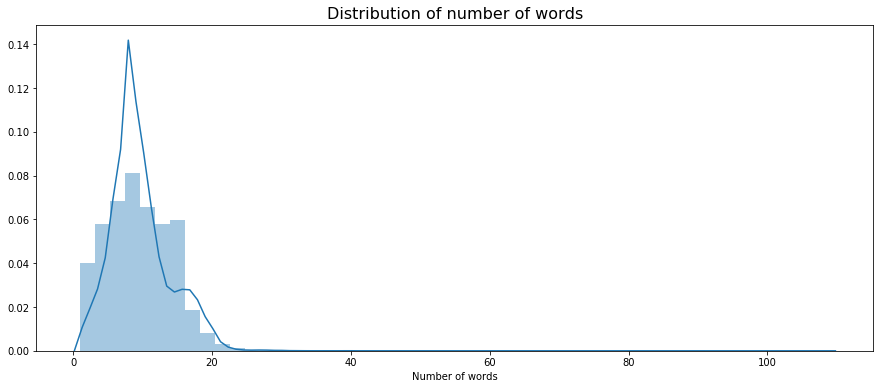

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
document_lengths = np.array(list(map(len, train_df.clean_text.str.split(' '))))

fig, ax = plt.subplots(figsize=(15,6))
ax.set_title("Distribution of number of words", fontsize=16)
ax.set_xlabel("Number of words")
sns.distplot(document_lengths, bins=50, ax=ax)

In [2]:
import pandas as pd
from gensim.models import Word2Vec

word2vec_model = Word2Vec.load("word2vec_twitter_50.model")

train_df = pd.read_pickle("./train_df_clean.pkl")
test_df = pd.read_pickle("./test_df_clean.pkl")

In [4]:
# padding for word embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

MAX_SEQUENCE_LENGTH = 20

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['clean_text'])
sequences = tokenizer.texts_to_sequences(train_df['clean_text'])

word_index = tokenizer.word_index

wordEmbedding_w2v_train  = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [6]:
# form embedding matrix (w2v)
import numpy as np
from tqdm import tqdm
vector_dim = 50
embedding_matrix = np.zeros((len(word_index) + 1, vector_dim))
missingWord = []
for word, i in tqdm(word_index.items()):
    try:
        embedding_vector = word2vec_model.wv[word]
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    except:
        missingWord.append(word)

100%|██████████| 138999/138999 [00:00<00:00, 509909.10it/s]


In [7]:
len(missingWord)

2347

In [12]:
print(missingWord)

['i', 'is', 'be', 'are', 'so', 'have', 'love', 'not', 'just', 'life', '️', 'what', 'when', 'today', 'up', 'day', 'will', 'was', 'can', 'like', "i'm", 'do', 'god', 'am', 'get', 'out', '❤', 'good', 'how', 'now', 'people', 'who', 'time', "it's", 'only', "don't", 'has', 'more', 's', '🙏', '😂', 'know', 'u', 'thank', 'never', 'got', 'make', 'see', 'pips', 'new', 'go', 'there', '😍', 'why', 'happy', 'great', 'been', 'realdonaldtrump', 'much', 't', 'back', 'work', 'still', "can't", 'need', 'thanks', 'going', 'always', 'want', 'come', 'really', 'best', 'had', 'way', 'even', 'world', 'right', 'would', 'over', 'too', 'being', 'please', 'give', 'last', 'first', 'think', 'hope', 'blessed', 'say', 'things', 'feel', 'man', 'then', 'did', 'lots', 'total', 'here', '🏻', '🏽', 'week', '🏼', 'follow', 'morning', 'ever', 'very', 'night', "you're", 'closed', 'once', 'm', 'better', 'let', '🏾', 'someone', '😭', 'eurusd', 'amazing', 'where', 'again', 'well', 'take', 'pm', 'year', 'sad', 'keep', 'feeling', 'days', '

In [7]:
#modeling
# for a classificaiton problem, you need to provide both training & testing data
div = int(train_df.shape[0]*0.8)

wordEmbedding_w2v_X_train = wordEmbedding_w2v_train[:div]
wordEmbedding_w2v_y_train = train_df['emotion'][:div]

wordEmbedding_w2v_X_test = wordEmbedding_w2v_train[div:]
wordEmbedding_w2v_y_test = train_df['emotion'][div:]

## take a look at data dimension is a good habbit  :)
print('we_w2v_X_train.shape: ', wordEmbedding_w2v_X_train.shape)
print('we_w2v_y_train.shape: ', wordEmbedding_w2v_y_train.shape)
print('we_w2v_X_test.shape: ', wordEmbedding_w2v_X_test.shape)
print('we_w2v_y_test.shape: ', wordEmbedding_w2v_y_test.shape)

we_w2v_X_train.shape:  (1164450, 20)
we_w2v_y_train.shape:  (1164450,)
we_w2v_X_test.shape:  (291113, 20)
we_w2v_y_test.shape:  (291113,)


#### Deep learning - LSTM

In [8]:
import keras
from sklearn.preprocessing import LabelEncoder

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

In [9]:
def encode(y_train, y_test):
    label_encoder = LabelEncoder()
    label_encoder.fit(y_train)
    print('check label: ', label_encoder.classes_)
    print('\n## Before convert')
    print('y_train[0:4]:\n', y_train[0:4])
    print('\ny_train.shape: ', y_train.shape)
    print('y_test.shape: ', y_test.shape)

    re_y_train = label_encode(label_encoder, y_train)
    re_y_test = label_encode(label_encoder, y_test)

    print('\n\n## After convert')
    print('y_train[0:4]:\n', y_train[0:4])
    print('\ny_train.shape: ', y_train.shape)
    print('y_test.shape: ', y_test.shape)
    
    return re_y_train, re_y_test, label_encoder

In [10]:
le_wordEmbedding_w2v_y_train, le_wordEmbedding_w2v_y_test, label_encoder = encode(wordEmbedding_w2v_y_train, wordEmbedding_w2v_y_test)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 0    anticipation
1         sadness
3            fear
5             joy
Name: emotion, dtype: object

y_train.shape:  (1164450,)
y_test.shape:  (291113,)


## After convert
y_train[0:4]:
 0    anticipation
1         sadness
3            fear
5             joy
Name: emotion, dtype: object

y_train.shape:  (1164450,)
y_test.shape:  (291113,)


In [11]:
# I/O check
input_shape = wordEmbedding_w2v_X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  20
output_shape:  8


In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Dropout, Activation, ActivityRegularization, SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.regularizers import l2
from keras.initializers import Constant
from keras import optimizers

model = Sequential()
model.add(Embedding(len(word_index) + 1,
                            vector_dim,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False))
# model.add(SpatialDropout1D(0.7))
model.add(LSTM(512, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

adam = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Using TensorFlow backend.


NameError: name 'word_index' is not defined

In [14]:
wordEmbedding_w2v_X_test

array([[    0,     0,     0, ...,    96,    14,    49],
       [    0,     0,     0, ...,  4209, 47041, 41258],
       [    0,     0,     0, ...,   667,  1656,   384],
       ...,
       [    0,     0,     0, ...,   767, 10562, 35402],
       [    0,     0,     0, ...,   208,  2336,  4147],
       [    0,     0,     0, ...,     3,   381, 13268]], dtype=int32)

In [ ]:
epochs = 3
batch_size = 128
history = model.fit(wordEmbedding_w2v_X_train, le_wordEmbedding_w2v_y_train, 
                    epochs=epochs, batch_size=batch_size,
                    validation_data = (wordEmbedding_w2v_X_test, le_wordEmbedding_w2v_y_test))

In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

y_pred_result = model.predict(x = wordEmbedding_w2v_X_test, batch_size=128)
y_pred_result = label_decode(label_encoder, y_pred_result)
print(classification_report(y_true=wordEmbedding_w2v_y_test, y_pred=y_pred_result))